In [1]:
import tensorflow
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\HRITIK\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HRITIK\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HRITIK\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HRITIK\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: P

In [2]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('images/train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('images/test',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory('images/validation',
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)

Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [6]:
classifier.fit_generator(train_set,
                        steps_per_epoch=300, 
                        epochs = 50,
                        validation_data = test_set,
                        validation_steps = 20, 
                        #callbacks=[tensorboard]
                        );
classifier.save('tammatomaize_model_bak.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
15/15 [==============================] - 9s 573ms/step - loss: 0.7200 - acc: 0.5854 - val_loss: 0.5405 - val_acc: 0.8583
Epoch 2/50
15/15 [==============================] - 3s 200ms/step - loss: 0.5477 - acc: 0.7292 - val_loss: 0.3130 - val_acc: 0.9333
Epoch 3/50
15/15 [==============================] - 3s 222ms/step - loss: 0.4599 - acc: 0.7667 - val_loss: 0.3692 - val_acc: 0.8000
Epoch 4/50
15/15 [==============================] - 3s 230ms/step - loss: 0.4387 - acc: 0.7854 - val_loss: 0.2924 - val_acc: 0.8500
Epoch 5/50
15/15 [==============================] - 3s 219ms/step - loss: 0.4192 - acc: 0.7979 - val_loss: 0.2142 - val_acc: 0.9333
Epoch 6/50
15/15 [==============================] - 3s 213ms/step - loss: 0.3856 - acc: 0.8313 - val_loss: 0.2605 - val_acc: 0.8750
Epoch 7/50
15/15 [==============================] - 3s 210ms/step - loss: 0.3645 - acc: 0.8521 - val_loss: 0.2819 - val_acc: 0.8833
Epoch 8/50
15/15 [==========

Epoch 38/50
15/15 [==============================] - 3s 204ms/step - loss: 0.0744 - acc: 0.9729 - val_loss: 0.4160 - val_acc: 0.8750
Epoch 39/50
15/15 [==============================] - 3s 221ms/step - loss: 0.0601 - acc: 0.9771 - val_loss: 0.4105 - val_acc: 0.9083
Epoch 40/50
15/15 [==============================] - 3s 212ms/step - loss: 0.0663 - acc: 0.9812 - val_loss: 0.4051 - val_acc: 0.8833
Epoch 41/50
15/15 [==============================] - 3s 217ms/step - loss: 0.0478 - acc: 0.9833 - val_loss: 0.3880 - val_acc: 0.9000
Epoch 42/50
15/15 [==============================] - 3s 212ms/step - loss: 0.0449 - acc: 0.9833 - val_loss: 0.4200 - val_acc: 0.8917
Epoch 43/50
15/15 [==============================] - 3s 213ms/step - loss: 0.0483 - acc: 0.9812 - val_loss: 0.4558 - val_acc: 0.8750
Epoch 44/50
15/15 [==============================] - 3s 216ms/step - loss: 0.0632 - acc: 0.9812 - val_loss: 0.3811 - val_acc: 0.9083
Epoch 45/50
15/15 [==============================] - 3s 213ms/step - 

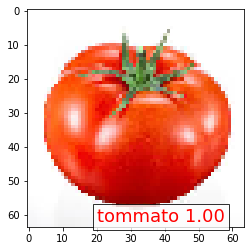

In [7]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('images/validation/tommato/20.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='tommato %1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='maize :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [11]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [12]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,maize\0.jpg,0.96846,0,1
1,maize\1.jpg,0.01478,0,0
2,maize\10.jpg,0.00063,0,0
3,maize\11.jpg,0.10031,0,0
4,maize\12.jpg,0.00000,0,0
5,maize\13.jpg,0.00567,0,0
6,maize\14.jpg,0.00008,0,0
7,maize\15.jpg,0.00010,0,0
8,maize\16.jpg,0.01385,0,0
9,maize\17.jpg,0.00027,0,0


In [13]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 14


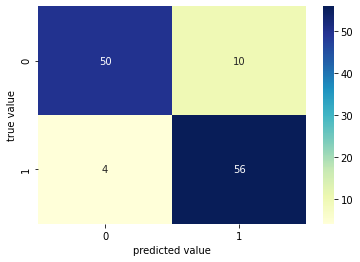

In [19]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

In [46]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total para

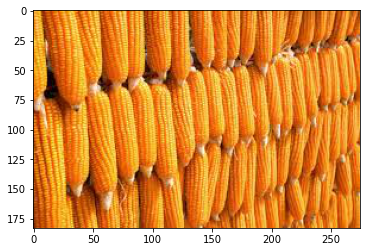

In [47]:
#Input Image for Layer visualization
0img1 = image.load_img('images/test/maize/14.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('images/test/maize/14.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

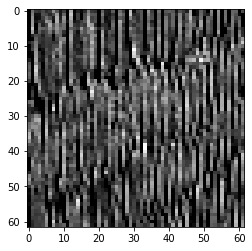

In [52]:
#filterimage
plt.imshow(conv2d_features[0, :, :, 4], cmap='gray')

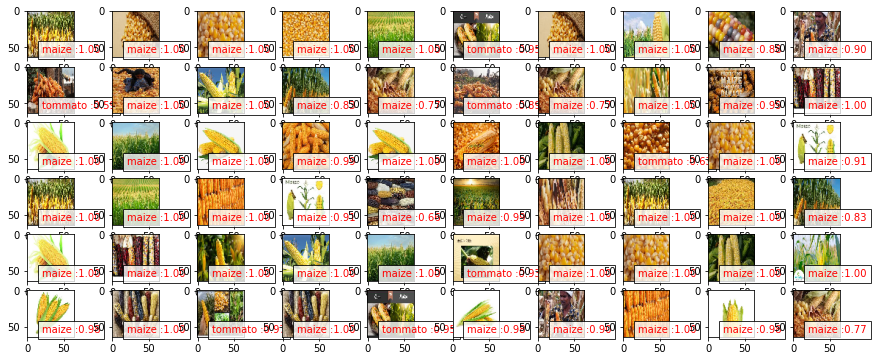

In [55]:
#Model Performance on Unseen Data
# ypred = classifier.predict_generator(test_set)

fig=plt.figure(figsize=(15, 6))
columns = 10
rows = 6
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('images/validation/'+test_set1.filenames[np.random.choice(range(60))], target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='tommato :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='maize :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)

In [83]:
# Model Accuracy
x1 = classifier.evaluate_generator(train_set)
x2 = classifier.evaluate_generator(test_set)
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 50.00%     Training loss  : 0.693297
Validation Accuracy: 50.00%     Validation loss: 0.693447
